In [1]:
import math
from collections import Counter

import plotly.express as px
import pandas as pd
import numpy as np
#rng = np.random.default_rng(2021)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

A method os estimating the value of an unknown quantity using the principles of inferential statistics

- **Inferential Statistics**:
  - Population: A set of examples
  - Sample: A proper subset of a population

Key fact: A **random sample** tends to exhibit the same properties as the population from which it is draw.

### **Coin Flip** 

**Suppose a fair coin:**

A = Which is the probability of 3 Heads?

```
P(A) =  0.5 * 0.5 * 0.5 = 0.125 
```

B = Which is the probability of  Head, Head and Tail?

``` 
Independent events, therefore:
P(B) =  0.5 * 0.5 * 0.5 = 0.125 
```

C = Which is the probability of 2 Heads and 1 tail?

```
Events:
H H T
H T H
T H H 

All Events:
(Head or Tail)
2*2*2 = 8

P(C) = Events/All Events = 3/8 = 0.375
```

D = Which is the probability of 7 Heads and 4 tails?

```
Events:

combinatorial problem of 7 given 11 (same as 4 given 11):
(12,7) = (12,4) = 330

All Events:
(Head or Tail)
2^(7+4)= 2048

P(C) = Events/All Events = 330/2048 = 0.1611328125 (Aprox)
```

### **General Coin** 

The general question would be:

A fair coin is tossed ```n``` times. What is the probability of ```N``` Heads (or Tails):

$$P(N) = {n \choose N}(0.5)^n$$

This equation is a specific case of general formula. If we had a unfair coin it would be possible to calculate the probability with the following formula:

$$P(N) = {n \choose N}p^N(1-p)^{n-N}$$

Besides that, python has already implemented this function for us:

```python
trials = np.random.binomial(n, p, qtd_trials)

P_N = np.mean(trials == N)
```


Some nomenclature:

* Tossing a single coin is called **Bernoulli trial**.
* Tossing a single coin multiple times returns a PDF (Probability Density Function) called **Bernoulli distribution**.

### **Bernoulli Distribution**

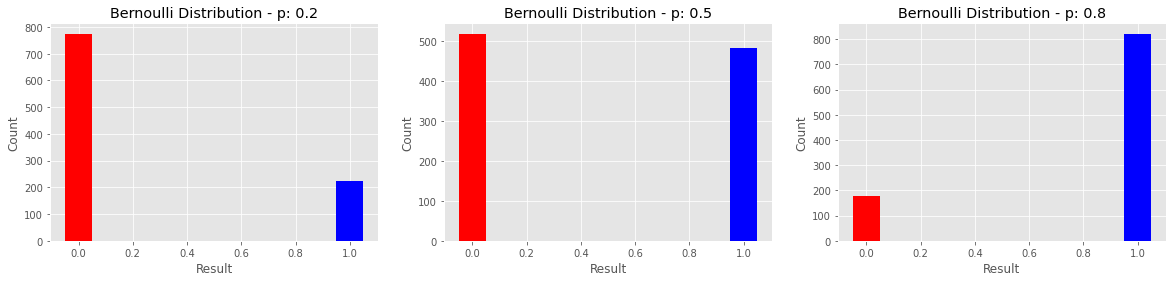

In [26]:
fig, axs = plt.subplots(1, 3,figsize=(20,4))

p = [0.2, 0.5, 0.8]
for p, ax in zip(p, axs.flatten()):
    
    z = np.random.binomial(1, p, 1000)
    ax.bar([0,1], [sum(z==0), sum(z==1)], width=0.1, color=["r", "b"])
    ax.set_title(f"Bernoulli Distribution - p: {p}")
    ax.set_ylabel("Count")
    ax.set_xlabel("Result")    

### **Binomial Distribution**

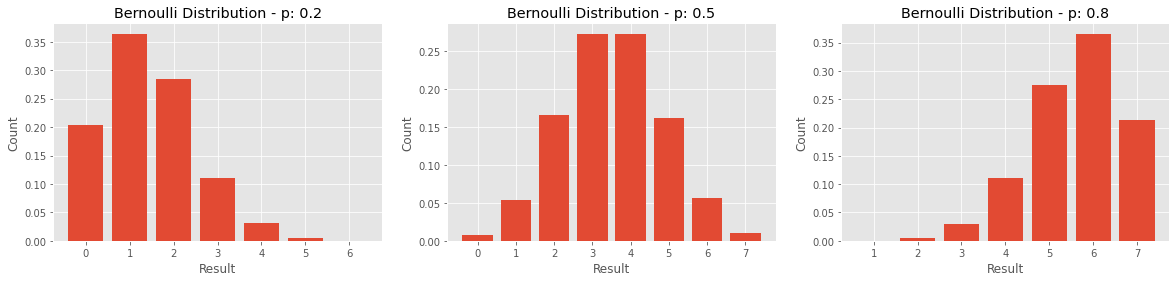

In [25]:
fig, axs = plt.subplots(1, 3,figsize=(20,4))

ps = [0.2, 0.5, 0.8]

for p, ax in zip(ps, axs.flatten()):
    
    z = Counter(np.random.binomial(7, p, 10000))
    counts = np.array(list(z.values()))
    P_N    = z.keys()
    ax.bar(P_N, counts/sum(counts))
    ax.set_title(f"Bernoulli Distribution - p: {p}")
    ax.set_ylabel("Count")
    ax.set_xlabel("Result")    

---

#### **Interactive Binomial Distribution**

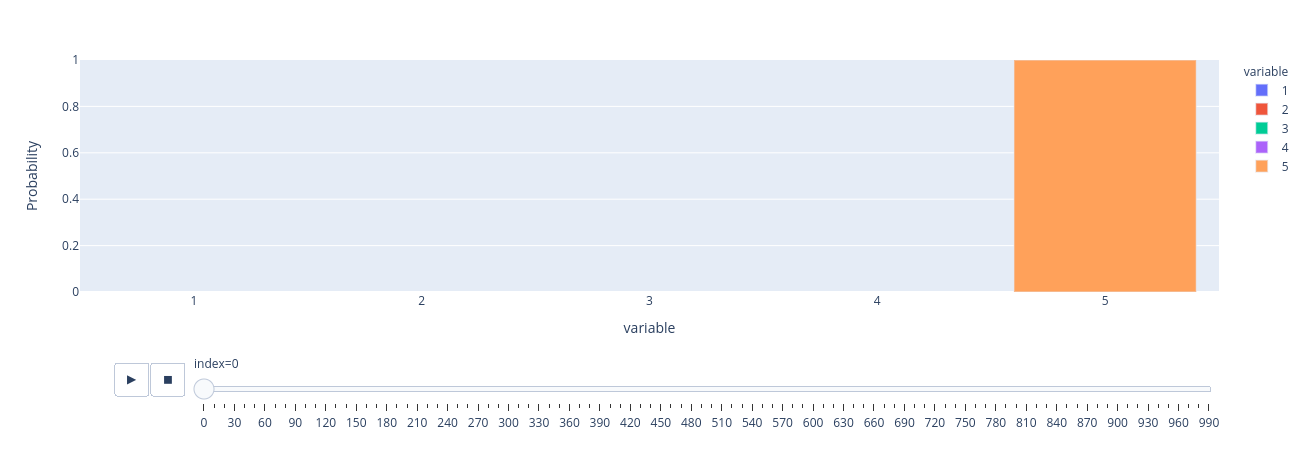

In [23]:
data = []
ps = [0.2, 0.5, 0.8]
n = 5
p = 0.5
acc = Counter()

for _ in range(1000):
    acc = acc + Counter(np.random.binomial(n, p, 1))
    tot = sum(acc.values())
    prob_acc = {key:acc[key]/tot for key in acc}
    data.append(prob_acc)
    
df = pd.DataFrame(data,   columns = range(1,n+1))
df = df.reset_index().melt(id_vars="index", var_name = "variable", value_name = "Probability")

fig = px.bar(df.query("index%10==0"), 
             x="variable", 
             y="Probability", 
             color="variable",
             animation_frame="index", 
             animation_group="variable", 
             range_y=[0,1])

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 200
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 100
fig.show()

Probabilidade de $N$ caras em $n$ lançamentos:

In [24]:
for i in range(1,n+1):
    print(f"P({i}) = {round(math.comb(n,i)*((1-p)**(n-i))*(p**i),3)}")

P(1) = 0.028
P(2) = 0.132
P(3) = 0.309
P(4) = 0.36
P(5) = 0.168


### **Inference**

#### **Example 1:**

You do not know if it is a fair coin. Suppose someone throw 100 coins:

**A = All of them were Heads**

In [37]:
print(f"Probability: 1/{2**100}")

Probability: 1/1267650600228229401496703205376


Knowing **A**, how likely is the next throw to be Head?

In [33]:
print(f"Probability: 100/100")

Probability: 100/100


Knowing **A**, how likely is the next throw to be Head? (It is a fair coin)

In [34]:
print(f"Probability: 1/2")

Probability: 1/2


Knowing **A**, how many Tails would you expect in the next 100 throws? (It is a fair coin)

#### **Example 2:**

Suppose someone throw 100 coins:

**B = 52 were Head and 48 Tails**

Knowing **B**, how likely is the next throw to be Head?

In [31]:
print(f"Probability: 52/100")

Probability: 52/100


Knowing **B**, how likely is the next throw to be Head? (It is a fair coin)

In [35]:
print(f"Probability: 1/2")

Probability: 1/2


Knowing **B**, how many Tails would you expect in the next 100 throws? (It is a fair coin)